# Recommendation System
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. 

## Book recommendation system
A book recommendation system is a type of algorithmic tool designed to suggest books to users based on their preferences, reading history, and other relevant factors. These systems utilize various techniques such as collaborative filtering, content-based filtering, and hybrid approaches to generate personalized recommendations. By analyzing user data and book characteristics, recommendation systems aim to enhance the user experience by helping individuals discover new books that align with their interests and tastes.

### Content
The Book-Crossing dataset comprises three files

+ **Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

+ **Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

+ **Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#### Book Dataset

In [2]:
Book=pd.read_csv('Books.csv')
Book.head()

C:\Users\Linta Stephen\AppData\Local\Temp\ipykernel_11492\2185158914.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Book=pd.read_csv('Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
Book.shape

(271360, 8)

There are 271360 rows and 8 columns

In [4]:
Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
Book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

While checking for the missing values we've find that "Book-Author","Publisher" & "Image-URL-L" columns have missing values.We are checking further more about it.

In [6]:
Book[Book['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [7]:
Book[Book['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [8]:
Book[Book['Image-URL-L'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [9]:
Book.duplicated().sum()

0

In [10]:
#Finding unique values in each column
for column in Book.columns:
    # Get unique values of the column
    unique_values=Book[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values of '{column}':")
    print(unique_values)
    print()

Unique values of 'ISBN':
['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752']

Unique values of 'Book-Title':
['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]

Unique values of 'Book-Author':
['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']

Unique values of 'Year-Of-Publication':
[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926

Here we can see that there are some entry errors in the "Year-Of-Publication" column.So we need to get more information about that entries.

In [11]:
#Finding the mismatched values
mismatched_values=Book[~Book['Year-Of-Publication'].astype(str).str.isdigit()]['Year-Of-Publication'].unique()

print("Mismatched values in 'Year-Of-Publication':")
print(mismatched_values)

Mismatched values in 'Year-Of-Publication':
['DK Publishing Inc' 'Gallimard']


In [12]:
#Finding the mismatched index
mismatched_indices=Book[~Book['Year-Of-Publication'].astype(str).str.isdigit()].index

print("Mismatched indices in 'Year-Of-Publication':")
print(mismatched_indices)

Mismatched indices in 'Year-Of-Publication':
Int64Index([209538, 220731, 221678], dtype='int64')


In [13]:
#view the entire row of error
Book.loc[mismatched_indices]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


**Now let's fix the missing & mis-matched values**

In [14]:
#Replace NaN value in the 'Book-Author' column
Book.iloc[187689]['Book-Author']='Larissa Anne Downes'

In [15]:
#Replace NaN values in 'Publisher' column
Book['Publisher']=Book['Publisher'].fillna({
    128890: 'NovelBooks,Inc',
    129037: 'Hodder & Stoughton'
})

In [16]:
#Drop useless column
Book.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)

In [17]:
Book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [18]:
display(Book.iloc[209538]['Book-Title'])
Book.iloc[209538]['Year-Of-Publication']

'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"'

'DK Publishing Inc'

In [19]:
display(Book.iloc[220731]['Book-Title'])
Book.iloc[220731]['Year-Of-Publication']

'Peuple du ciel, suivi de \'Les Bergers\\";Jean-Marie Gustave Le ClÃ?Â©zio"'

'Gallimard'

In [20]:
display(Book.iloc[221678]['Book-Title'])
Book.iloc[221678]['Year-Of-Publication']

'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"'

'DK Publishing Inc'

In [21]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [22]:
replace_df_value(Book, 209538, 'Book-Title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(Book, 209538, 'Book-Author', 'Michael Teitelbaum')
replace_df_value(Book, 209538, 'Year-Of-Publication', 2000)
replace_df_value(Book, 209538, 'Publisher', 'DK Publishing Inc')

replace_df_value(Book, 221678, 'Book-Title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(Book, 221678, 'Book-Author', 'James Buckley')
replace_df_value(Book, 221678, 'Year-Of-Publication', 2000)
replace_df_value(Book, 221678, 'Publisher', 'DK Publishing Inc')

replace_df_value(Book, 220731,'Book-Title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(Book, 220731, 'Book-Author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(Book, 220731, 'Year-Of-Publication', 1990)
replace_df_value(Book, 220731, 'Publisher', 'Gallimard')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [23]:
Book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [24]:
#Checking data types 
Book.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

In [25]:
#Changing the data type of 'Year-Of-Publication' column
Book['Year-Of-Publication']=Book['Year-Of-Publication'].astype('int64')

In [26]:
Book['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]

2050        2
2038        1
2037        1
2030        7
2026        1
2024        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       46
2004     5839
2003    14358
2002    17627
2001    17359
2000    17234
1999    17431
Name: Year-Of-Publication, dtype: int64

In 'Year-Of-Publication' column there are some future years,which is not applicable.

In [27]:
Book[Book['Year-Of-Publication']>2024][['Book-Title','Year-Of-Publication','Publisher','Book-Author']]

,Book-Title,Year-Of-Publication,Publisher,Book-Author
37487,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,2030,Aladdin,Coville
55676,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,2030,Aladdin,Bruce Coville
78168,Crossing America,2030,National Geographic,National Geographic Society
80264,Alice's Adventures in Wonderland and Through t...,2050,Puffin Books,Lewis Carroll
97826,Outline of European Architecture (Pelican S.),2050,Penguin USA,Nikolaus Pevsner
116053,Three Plays of Eugene Oneill,2038,Vintage Books USA,Eugene O'Neill
118294,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,2026,Goldmann,Kathy Lette
192993,"Field Guide to the Birds of North America, 3rd...",2030,National Geographic,National Geographic Society
228173,FOREST PEOPLE (Touchstone Books (Hardcover)),2030,Simon &amp; Schuster,Colin M. Turnbull
240169,In Our Time: Stories (Scribner Classic),2030,Collier Books,Ernest Hemingway


Here we have to change the years.

In [28]:
#Changing the future years
#'MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)'
Book.loc[37487, 'Year-Of-Publication']=1991

Book.loc[37487, 'Book-Author']='Bruce Coville'

# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
Book.loc[55676, 'Year-Of-Publication']=2005

# "Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)"
Book.loc[80264, 'Year-Of-Publication']=2003

# 'Field Guide to the Birds of North America, 3rd Ed.'
Book.loc[192993, 'Year-Of-Publication']=2003

# Crossing America
Book.loc[78168, 'Year-Of-Publication']=2001

# Outline of European Architecture (Pelican S.)
Book.loc[97826, 'Year-Of-Publication']=1981

# Three Plays of Eugene Oneill
Book.loc[116053, 'Year-Of-Publication']=1995

# Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.
Book.loc[118294, 'Year-Of-Publication']=2023

# FOREST PEOPLE (Touchstone Books (Hardcover))
Book.loc[228173, 'Year-Of-Publication']=1987

# In Our Time: Stories (Scribner Classic)
Book.loc[240169, 'Year-Of-Publication']=1996

# To Have and Have Not
Book.loc[255409, 'Year-Of-Publication']=1937

# FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS
Book.loc[260974, 'Year-Of-Publication']=1991

In [29]:
Book['Year-Of-Publication'].value_counts().sort_index(ascending=False)

2024       1
2023       1
2021       1
2020       3
2012       1
        ... 
1897       1
1806       1
1378       1
1376       1
0       4618
Name: Year-Of-Publication, Length: 112, dtype: int64

Here we've some entries without year data so it is given as 0.The books in the years 1378,1376 may be mythological and religious books so the date could be correct. So we donot alter the date for these entries.

In [30]:
#Number of Books published  yearly.
Yearly_Publication= Book[Book['Year-Of-Publication']!=0]['Year-Of-Publication'].value_counts().sort_index(ascending=False)
Yearly_Publication

2024    1
2023    1
2021    1
2020    3
2012    1
       ..
1900    3
1897    1
1806    1
1378    1
1376    1
Name: Year-Of-Publication, Length: 111, dtype: int64

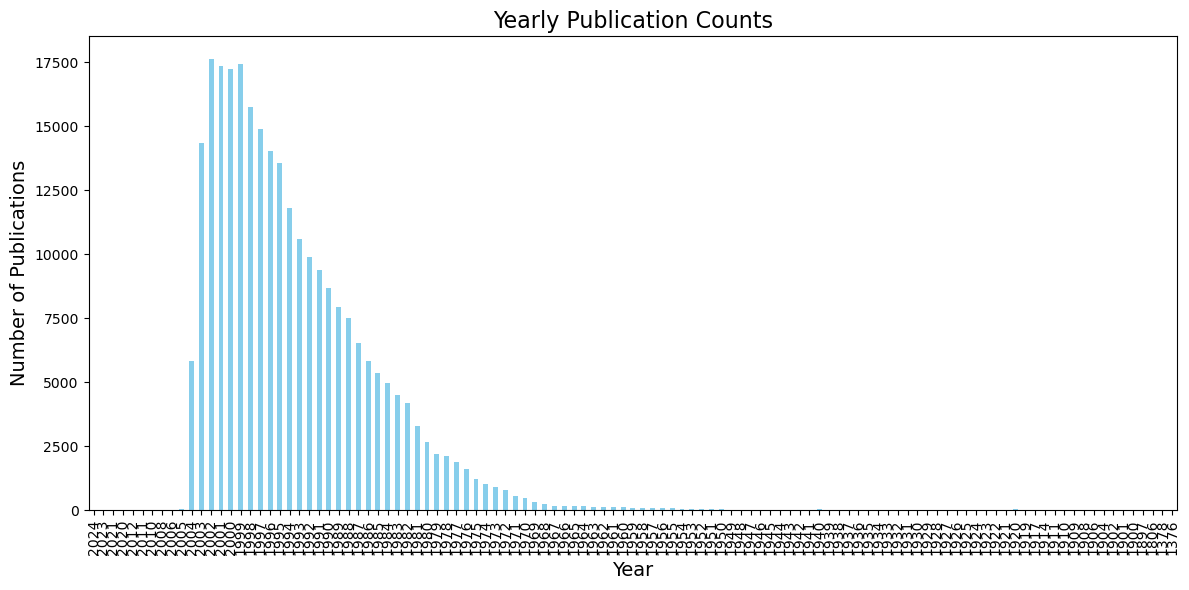

In [31]:
#Plotting
plt.figure(figsize=(12, 6))
Yearly_Publication.plot(kind='bar', color='skyblue')
# Adding labels and title
plt.title('Yearly Publication Counts', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)
plt.tight_layout()
plt.show()

The publication of books got vital when it starts emerging from 1950.We can see that the number of publications are increasing over years.It might happen people starts to understand the importance of books and gradually got productivity habits in their life.
The highest peak we can observe is between 1997-2002.

As we have many entries without year data, we can replace it with the mode.

In [32]:
from collections import Counter

In [33]:
count = Counter(Book['Year-Of-Publication'])
[k for k, v in count.items() if v == max(count.values())]

[2002]

In [34]:
Book.loc[Book['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [35]:
Book['Year-Of-Publication'].value_counts().sort_index(ascending=False)

2024    1
2023    1
2021    1
2020    3
2012    1
       ..
1900    3
1897    1
1806    1
1378    1
1376    1
Name: Year-Of-Publication, Length: 111, dtype: int64

In [36]:
Author=Book['Book-Author'].value_counts()
Author.head(20)

Agatha Christie          632
William Shakespeare      567
Stephen King             524
Ann M. Martin            423
Carolyn Keene            373
Francine Pascal          372
Isaac Asimov             330
Nora Roberts             315
Barbara Cartland         307
Charles Dickens          302
Not Applicable (Na )     286
R. L. Stine              282
Mark Twain               231
Jane Austen              223
Terry Pratchett          220
Mary Higgins Clark       218
Piers Anthony            217
Marion Zimmer Bradley    216
Janet Dailey             214
Franklin W. Dixon        204
Name: Book-Author, dtype: int64

There are a lot of books with no authors(Not Applicable).

In [37]:
#Top Authors with number of books
Author=Book[Book['Book-Author']!= 'Not Applicable (Na )']
Author=Author.groupby('Book-Author').count()['Book-Title'].sort_values(ascending=False).head(50)
Author.head(10)

Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: Book-Title, dtype: int64

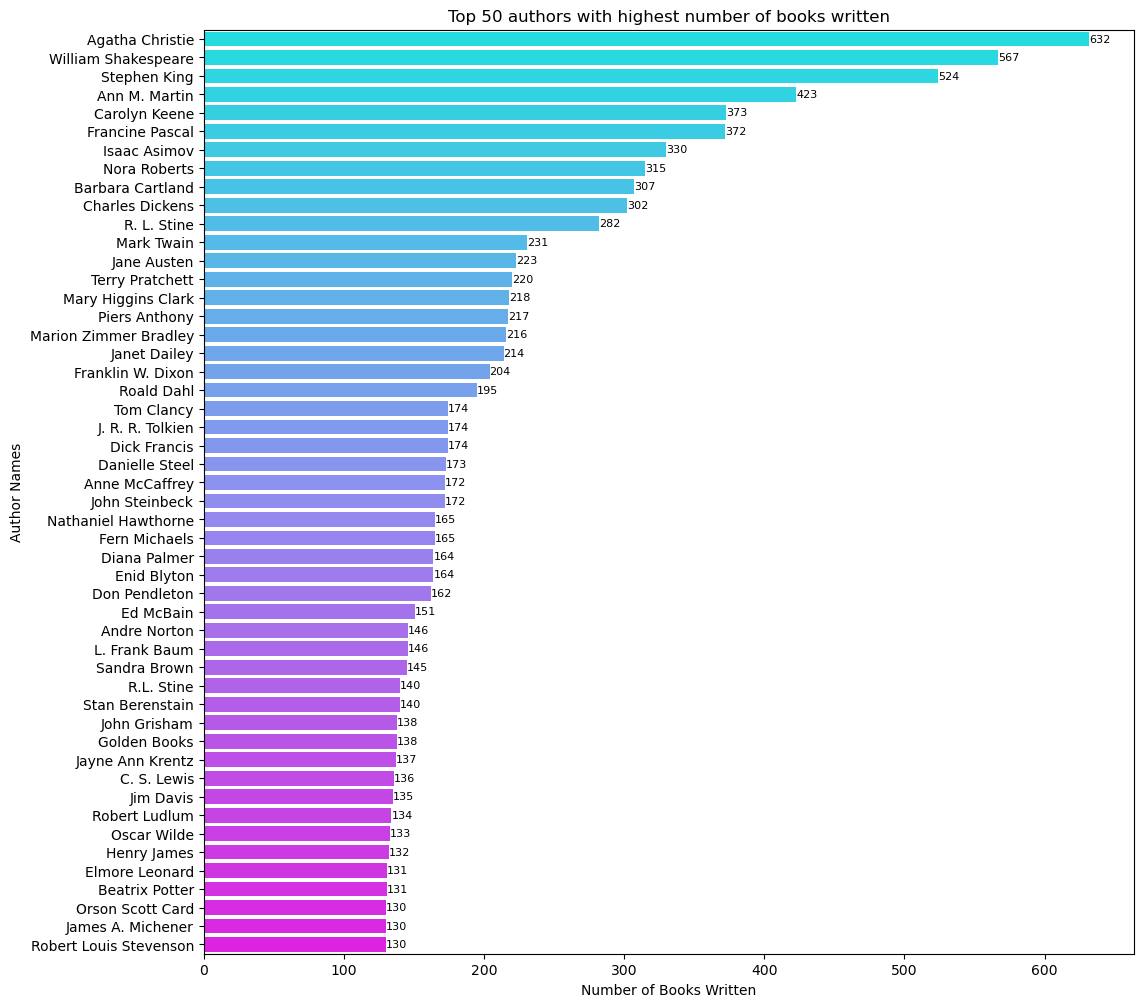

In [38]:
#Plotting
cool=sns.color_palette("cool", n_colors=len(Author.values))
plt.figure(figsize=(12, 12))
sns_plot=sns.barplot(y=Author.index,
                       x=Author.values, palette=cool, orient='h')

for i, value in enumerate(Author.values):
    sns_plot.text(value, i, int(value), ha="left",
                  va="center", color='black', fontsize=8)

plt.ylabel("Author Names")
plt.xlabel("Number of Books Written")
plt.title("Top 50 authors with highest number of books written")
plt.show()

Agatha Christie is leading at top with 632 counts, followed by William Shakespeare.
It can happen in some possible cases that Agatha Christie is not a best Author, though Agatha Christie has most number of books as compared to others.
William Shakespeare is one of the popular Author in the world. Still he doesn't have highest number of books.
Among all other Authors, it might happen that few of the Author might have some of the best seller books who have millions of copies been sold in world.

In [39]:
Publisher=Book['Publisher'].value_counts()
Publisher

Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Ugly Town                     1
Connaught                     1
Name: Publisher, Length: 16806, dtype: int64

In [40]:
#Top publishers with number of book published
Publisher=Publisher.sort_values(ascending=False)[:51]
Publisher

Harlequin                             7535
Silhouette                            4220
Pocket                                3905
Ballantine Books                      3783
Bantam Books                          3646
Scholastic                            3160
Simon &amp; Schuster                  2971
Penguin Books                         2844
Berkley Publishing Group              2771
Warner Books                          2727
Penguin USA                           2717
Harpercollins                         2525
Fawcett Books                         2258
Signet Book                           2070
Random House Inc                      2045
St Martins Pr                         1953
St. Martin's Press                    1783
Tor Books                             1704
HarperCollins Publishers              1700
Zebra Books                           1694
Bantam                                1660
Avon                                  1566
Jove Books                            1553
Vintage Boo

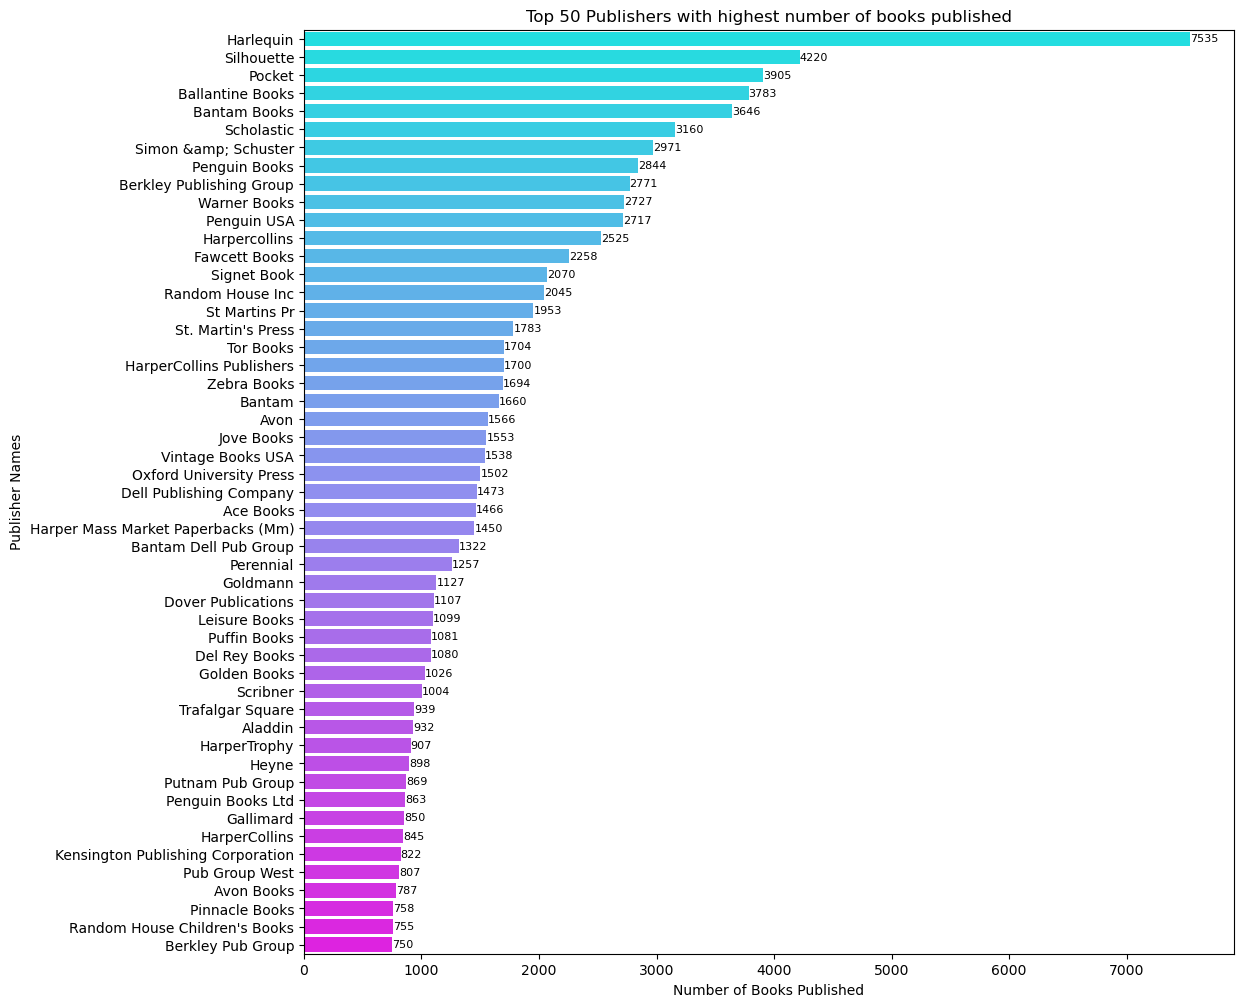

In [41]:
#Plotting
cool=sns.color_palette("cool", n_colors=len(Publisher.values))
plt.figure(figsize=(12, 12))
sns_plot = sns.barplot(y=Publisher.index,
            x=Publisher.values, palette=cool,orient='h')

for i, value in enumerate(Publisher.values):
    sns_plot.text(value, i, int(value), ha="left",
                  va="center", color='black', fontsize=8)
                  

plt.ylabel("Publisher Names")
plt.xlabel("Number of Books Published")
plt.title("Top 50 Publishers with highest number of books published")
plt.show()

Harlequin has most number of books published, followed by Silhouette.
Some of the top Author's had published their books from Harlequin.
We can observe Harlequin publiser's marking better performance than any other publishers.
Penguin Books, Warner Books, Penguin USA, Berkely Publishing Group and many more are among popular publisher's remarking competition with Harlequin.
Though Penguin Books Publisher has less number of books published but it might happen that only top Author's are approaching towards Penguin Books Publisher.

#### User Dataset

In [42]:
User=pd.read_csv('Users.csv')
User.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [43]:
User.shape

(278858, 3)

There are 278858 rows and 3 columns

In [44]:
User.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [45]:
#Finding unique values in each column
for column in User.columns:
    # Get unique values of the column
    unique_values=User[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values of '{column}':")
    print(unique_values)
    print()

Unique values of 'User-ID':
[     1      2      3 ... 278856 278857 278858]

Unique values of 'Location':
['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']

Unique values of 'Age':
[ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 108. 210.  88. 199. 147. 168.

In the 'Age'column we can see many missing values and also outliers,ie,age greater than 100.So we need to handle this.

In [46]:
User.Location.nunique()

57339

In [47]:
for i in User:
    User['Country']=User.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$') 

In [48]:
#drop location column
User.drop('Location',axis=1,inplace=True)

In [49]:
#User.info()

In [50]:
#Displaying the country names
set(User['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

Here some data are mis-spelled, let's correct it.

In [51]:
#correcting the mispelled country names
User.loc[User['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
User.loc[User['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
User.loc[User['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'  
User.loc[User['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'                                      
User.loc[User['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
User.loc[User['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
User.loc[User['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
User['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)  

In [52]:
#Converting the country names to uppercase
User['Country']=User['Country'].str.upper()

Text(0.5, 1.0, 'Count of users Country wise')

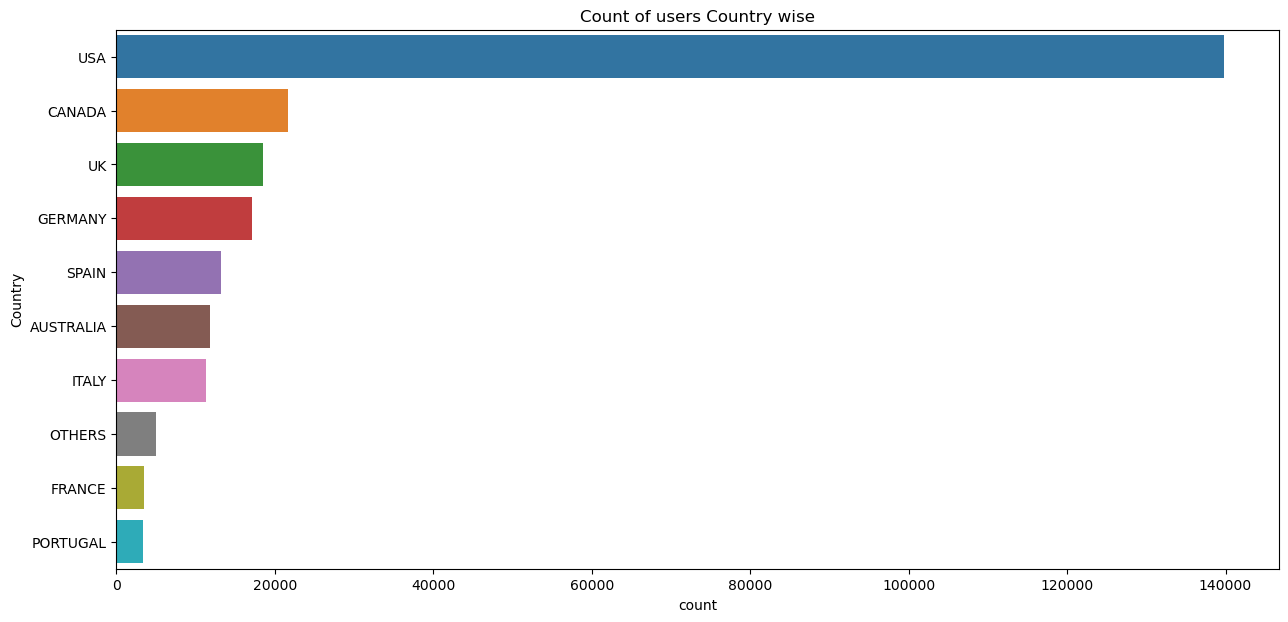

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=User,order=pd.value_counts(User['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

From this graph we can observe that most of the users are from USA.

In [54]:
User.isnull().sum()

User-ID         0
Age        110762
Country         0
dtype: int64

Many missing values are present in Age column.

In [55]:
# retrieving Age data between 10 to 100
User.loc[(User['Age']>100)|(User['Age']<10)]=np.nan

In [56]:
#Filling null values with mean
User['Age'].fillna((User['Age'].mean()),inplace=True)

In [57]:
User['Age'].unique()

array([ 34.77712242,  18.        ,  17.        ,  61.        ,
        26.        ,  14.        ,  25.        ,  19.        ,
        46.        ,  55.        ,  32.        ,  24.        ,
        20.        ,  34.        ,  23.        ,  51.        ,
        31.        ,  21.        ,  44.        ,  30.        ,
        57.        ,  43.        ,  37.        ,  41.        ,
        54.        ,  42.        ,  50.        ,  39.        ,
        53.        ,  47.        ,  36.        ,  28.        ,
        35.        ,  13.        ,  58.        ,  49.        ,
        38.        ,  45.        ,  62.        ,  63.        ,
        27.        ,  33.        ,  29.        ,  66.        ,
        40.        ,  15.        ,  60.        ,  79.        ,
        22.        ,  16.        ,  65.        ,  59.        ,
        48.        ,  72.        ,  56.        ,  67.        ,
        80.        ,  52.        ,  69.        ,  71.        ,
        73.        ,  78.        ,  64.        ,  12.  

In [58]:
User['Age'].isna().sum()

0

In [59]:
User['Age']=User['Age'].astype(int) 

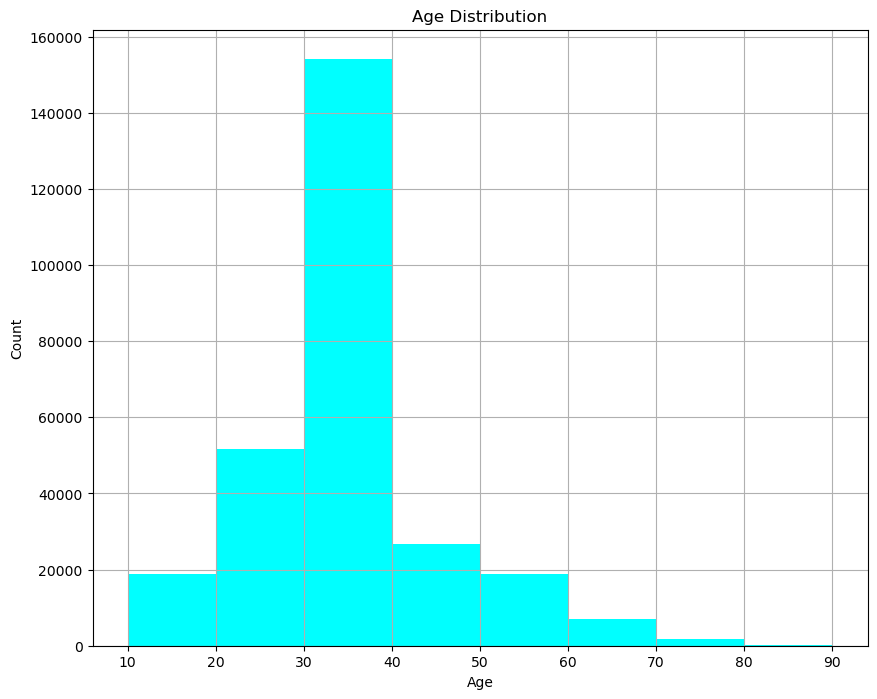

In [60]:
plt.figure(figsize=(10,8))
User.Age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

+ It is obvious that most of the user books are from Age 30 to 40.
+ The age group between 20-30 are immensely attracted to read books published by Author.
+ We can observe same pitch for Age group between 10-20 and 50-60. There are can be lot of different reasons.

In [61]:
User.duplicated().sum()

1434

In [62]:
## Drop duplicate rows
User.drop_duplicates(keep='last',inplace=True)
User.reset_index(drop=True,inplace=True)

In [63]:
User.head(4)

,User-ID,Age,Country
0,1.0,34,USA
1,2.0,18,USA
2,3.0,34,RUSSIA
3,4.0,17,PORTUGAL


In [64]:
User['User-ID'].isna().sum()

1

In [65]:
User=User.dropna(subset=['User-ID'])

In [66]:
User['User-ID']=User['User-ID'].astype(int)

In [67]:
User.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277423 entries, 0 to 277423
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  277423 non-null  int32 
 1   Age      277423 non-null  int32 
 2   Country  277423 non-null  object
dtypes: int32(2), object(1)
memory usage: 6.3+ MB


In [68]:
User.shape

(277423, 3)

#### Rating Dataset

In [69]:
Rating=pd.read_csv('Ratings.csv')
Rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [70]:
Rating.shape

(1149780, 3)

In [71]:
Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [72]:
Rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

No null values are present in Rating dataset.

In [73]:
# finding unique ISBNs from Rating and Book dataset
unique_ISBN=Rating[Rating.ISBN.isin(Book.ISBN)]
unique_ISBN.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [74]:
unique_ISBN.shape

(1031136, 3)

In [75]:
#Finding unique values in 'Book-Rating' column
unique_ISBN['Book-Rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

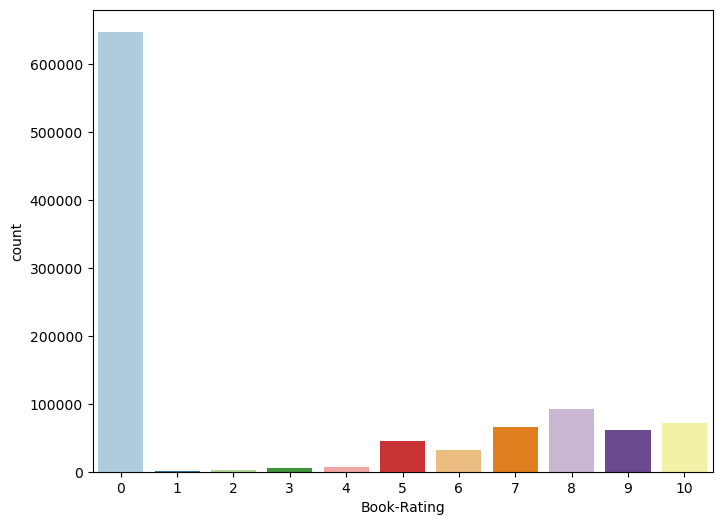

In [76]:
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating",palette = 'Paired',data=unique_ISBN)

Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.
+ This plot shows that users have rated 0 the most, which means they haven't rated books at all.

Text(0.5, 1.0, 'Explicit Ratings')

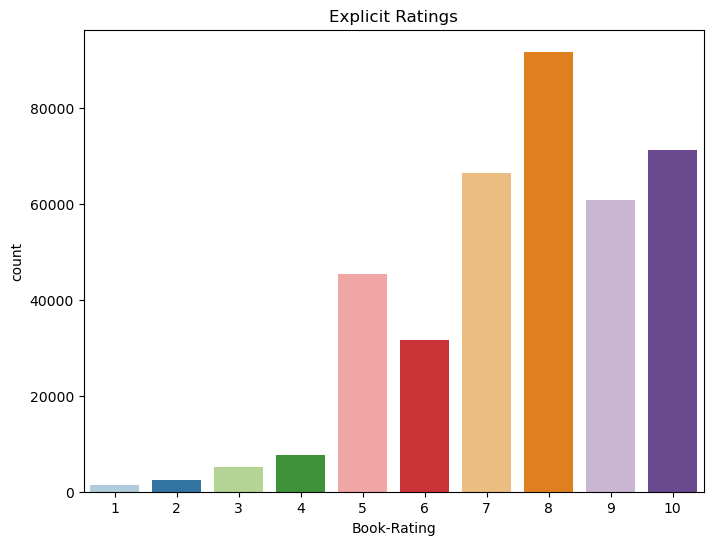

In [77]:
#Explicit Ratings(1-10)
plt.figure(figsize=(8,6))
data=unique_ISBN[unique_ISBN['Book-Rating']!= 0]
sns.countplot(x="Book-Rating",palette = 'Paired',data=data)
plt.title("Explicit Ratings")

+ Mostly the users have rated 8 ratings out of 10 as per books.This may happen when the feedback is positive but not extremely positive as 10 ratings (i.e best books ever).
+ Rating 1-4 can be negative impact for books been published.
+ For 5 ratings the users might not sure about book ratings whether it's positive or negative impact.

In [78]:
#Separating Explicit & Implicit ratings
Explicit_Rating=data
Implicit_Rating=unique_ISBN[unique_ISBN['Book-Rating'] == 0]

In [79]:
Explicit_Rating.shape

(383842, 3)

In [80]:
Implicit_Rating.shape

(647294, 3)

In [81]:
# most popular explicitely rated books
Explicit_Rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21945,0316666343,707
117745,0971880107,581
38819,0385504209,487
18058,0312195516,383
4131,0060928336,320
68898,059035342X,313
12325,0142001740,307
51799,0446672211,295
47986,044023722X,281
57625,0452282152,278


In [82]:
# getting the book names corresponding to these ISBNs
ISBN_Number=['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
Book[Book['ISBN'].isin(ISBN_Number)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
748,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


The most explicitly rated book is "The Lovely Bones:A Novel".

#### Merging Datasets

In [83]:
Merged_data=pd.merge(User,Explicit_Rating,on='User-ID')
Final_Dataset=pd.merge(Merged_data,Book,on='ISBN')

In [84]:
# Save the DataFrame to a CSV file
Final_Dataset.to_csv('final_dataset.csv', index=False)

In [85]:
Final_Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,34,CANADA,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,11676,34,OTHERS,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,67544,30,CANADA,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,116866,34,OTHERS,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,123629,34,CANADA,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [86]:
Final_Dataset.shape

(381461, 9)

In [87]:
Final_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381461 entries, 0 to 381460
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              381461 non-null  int32 
 1   Age                  381461 non-null  int32 
 2   Country              381461 non-null  object
 3   ISBN                 381461 non-null  object
 4   Book-Rating          381461 non-null  int64 
 5   Book-Title           381461 non-null  object
 6   Book-Author          381461 non-null  object
 7   Year-Of-Publication  381461 non-null  int64 
 8   Publisher            381461 non-null  object
dtypes: int32(2), int64(2), object(5)
memory usage: 26.2+ MB


In [88]:
Final_Dataset.isnull().sum()

User-ID                0
Age                    0
Country                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [89]:
#Finding unique values in each column
for column in Final_Dataset.columns:
    # Get unique values of the column
    unique_values=Final_Dataset[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values of '{column}':")
    print(unique_values)
    print()

Unique values of 'User-ID':
[     8  11676  67544 ... 278710 278713 278721]

Unique values of 'Age':
[ 34  30  60  27  38  23  29  72  54  36  44  39  25  81  28  43  53  37
  58  67  42  47  31  24  32  21  45  64  33  62  48  18  19  41  61  22
  50  26  17  51  57  35  52  14  20  16  40  46  15  49  65  59  73  56
  12  68  70  69  66  55  90  79  13  63  76  75  80  71  10  82  74  78
 100  77  85  11  84  83  99  97  93  96  86  94  89  92  98]

Unique values of 'Country':
['CANADA' 'OTHERS' 'USA' 'FRANCE' 'UK' 'NEW ZEALAND' 'NETHERLANDS'
 'GERMANY' 'SPAIN' 'PORTUGAL' 'IRAN' 'MALAYSIA' 'AUSTRALIA' 'SINGAPORE'
 'AUSTRIA' 'PHILIPPINES' 'BELGIUM' 'ITALY' 'SWITZERLAND' 'SLOVENIA'
 'TURKEY' 'FINLAND' 'CHILE' 'MEXICO' 'KUWAIT' 'ANTARCTICA' 'K1C7B1'
 'HONG KONG' 'ROMANIA' 'EGYPT' 'CHINA' 'LUXEMBOURG' 'NORWAY' 'HONDURAS'
 'ZIMBABWE' 'QATAR' 'ANDORRA' 'TAIWAN' 'INDIA' 'POLAND' 'ICELAND'
 'IRELAND' 'ARUBA' 'GREECE' 'JAPAN' 'BRAZIL' 'VAN WERT' 'BERMUDA'
 'BAHAMAS' 'SAUDI ARABIA' 'ALBANIA' '

#### 1)Popularity Based Recommendation

We can create a user's input to enter a book name and the number of books we want to receive recommendations for.

In [90]:
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

Enter a book name: The Da Vinci Code
Enter number of books to recommend: 5


**Popular Books based on the number of Ratings**

We can defines a function which aims to recommend popular books based on the number of ratings they have received.

In [91]:
def popularity_based(Final_Dataset, n):
    if n >= 1 and n <= len(Final_Dataset):
        data = pd.DataFrame(Final_Dataset.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False).head(n)
        result = pd.merge(data, Book, on='ISBN')
        return result
    return "Invalid number of books entered!!"

+ This function takes two arguments: Final_Dataset and n
+ It first checks if the value of n is within a valid range (1 <= n <= len(Final_Dataset)).
+ Then it groups the Final_Dataset by the ISBN (International Standard Book Number) and counts the number of ratings for each book.
+ It sorts the resulting DataFrame in descending order based on the count of ratings and selects the top n books.
+ Finally, it merges this data with Book DataFrame based on the ISBN.
+ If the input value of n is not within the valid range, it returns a message saying "Invalid number of books entered!!".

In [92]:
print("Top", number, "Popular books are: ")
popularity_based(Final_Dataset, number)

Top 5 Popular books are: 


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,702,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,0971880107,579,Wild Animus,Rich Shapero,2004,Too Far
2,0385504209,485,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0312195516,382,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
4,0060928336,318,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


+ This shows the top 5 popular books along with their ISBN, number of ratings, title, author, year of publication, and publisher and these books are sorted based on the count of ratings in descending order.
+ "The Lovely Bones:A Novel" writtten by Alice Seboid published in the year 2002 is the first recommended popular book according to the ratings.

**Popular books within the specified country based on the number of ratings**

Let's defines a function to recommend popular books within a specified country based on the number of ratings. 

In [93]:
def country_popular(Final_Dataset, country):
    if country in list(Final_Dataset['Country'].unique()):
        return popularity_based(Final_Dataset[Final_Dataset['Country'] == country],5)
    return "Invalid Entry"

+ This function takes two arguments: Final_Dataset and country.
+ It first checks if the specified country exists in the unique values of the 'Country' column in the Final_Dataset.
+ If yes, it filters the Final_Dataset to contain only the rows corresponding to the specified country and then calls the popularity_based function to recommend the top 5 popular books within that country.
+ If no, it returns "Invalid Entry".

In [94]:
country_popular(Final_Dataset,'INDIA')

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0971880107,3,Wild Animus,Rich Shapero,2004,Too Far
1,0671047612,2,Skin And Bones,Franklin W. Dixon,2000,Aladdin
2,0486284735,2,Pride and Prejudice (Dover Thrift Editions),Jane Austen,1995,Dover Publications
3,8171670407,2,Inscrutable Americans,Mathur Anurag,1996,South Asia Books
4,0671504282,1,LAW OF THE JUNGLE (HARDY BOYS CASE FILE 105) :...,Franklin W. Dixon,1995,Simon Pulse


+ This gives the top 5 popular books within the specified country. The books are sorted based on the count of ratings in descending order.
+ Here we enter the country name as 'INDIA',so it displays the top rated book as "Wild Animus" written by Rich Shapero published in the year 2004.

**Books by the same author and books by the same publisher as the given book**

Let's defines a function to recommend books by the same author and books by the same publisher as the given book.

In [95]:
def printBook(k, n):
    z = k['Book-Title'].unique()
    for x in range(len(z)):
        print(z[x])
        if x >= n-1:
            break

This function  takes a DataFrame k and an integer n as input. It extracts unique book titles from the DataFrame and prints them. It prints up to n unique book titles.

In [96]:
def get_books(dataframe, name, n):
    print("\nBooks by same Author:\n")
    au = dataframe['Book-Author'].unique()

    data =Final_Dataset[Final_Dataset['Book-Title'] != name]

    if au[0] in list(data['Book-Author'].unique()):
        k2 = data[data['Book-Author'] == au[0]]
    k2 = k2.sort_values(by=['Book-Rating'])
    printBook(k2, n)

    print("\n\nBooks by same Publisher:\n")
    au = dataframe['Publisher'].unique()

    if au[0] in list(data['Publisher'].unique()):
        k2 = pd.DataFrame(data[data['Publisher'] == au[0]])
    k2=k2.sort_values(by=['Book-Rating']) 
    printBook(k2, n)

+ This function  takes three arguments: dataframe, name, and n. 
+ It first prints the header for books by the same author, then it extracts unique authors from the dataframe. 
+ It filters the dataset to exclude the given book and then checks if the author of the given book has other books in the dataset. 
+ If yes, it retrieves those books and sorts them by rating, then prints them using the printBook function.


+ Similarly, it prints the header for books by the same publisher.
+ Extracts unique publishers from the dataframe.
+ Filters the dataset to exclude the given book, and then checks if the publisher of the given book has other books in the dataset. 
+ If so, it retrieves those books, sorts them by rating, and prints them using the printBook function.

In [97]:
if bookName in list(Final_Dataset['Book-Title'].unique()):
    d =Final_Dataset[Final_Dataset['Book-Title'] == bookName]
    get_books(d, bookName, number)
else:
    print("Invalid Book Name!!")


Books by same Author:

Digital Fortress : A Thriller
Angels &amp; Demons
Deception Point
Illuminati.
El Codigo Da Vinci / The Da Vinci Code


Books by same Publisher:

The Curious Incident of the Dog in the Night-Time : A Novel
Bleachers
A Painted House
Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson
Under the Banner of Heaven : A Story of Violent Faith


As we have given "The Da Vinci Code" as the book, it gives the books written by Dan Brown.

**Popular book for each year**

Let's define a function to find the most popular book for each year based on the number of ratings.

In [98]:
data = pd.DataFrame(Final_Dataset.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False)
data = pd.merge(data, Book, on='ISBN')

years = set()
indices = []
for ind, row in data.iterrows():
    if row['Year-Of-Publication'] in years:
        indices.append(ind)
    else:
        years.add(row['Year-Of-Publication'])

data = data.drop(indices)
data = data.drop('Book-Rating', axis = 1)
data = data.sort_values('Year-Of-Publication')

pd.set_option("display.max_rows", None, "display.max_columns", None)
data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
73451,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz
73453,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus
129793,0781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806,Reprint Services Corp
81024,1551103982,The Cycling Adventures of Coconut Head: A Nort...,Ted Schredd,1900,Graphic Arts Center Pub Co
121996,0671825356,W D HSE PLANTS,Jd Hersey,1901,Simon &amp; Schuster
49497,0373226888,Tommy's Mom,Linda O. Johnston,1902,Harlequin
105843,038528120X,CATCH 22,JOSEPH HELLER,1904,Delta
102556,0404089119,Charlotte Bronte and Her Sisters,Clement K. Shorter,1906,Ams Pr
23180,0911662251,Kybalion: A Study of the Hermetic Philosophy o...,Three Initiates,1908,Yoga Publication Society
50718,0891908994,Bitter Winds of Love,Barbara Cartland,1911,Amereon Ltd


+ It groups the dataset by ISBN, counts the number of ratings for each book, then merges this information with the Book dataset. After that, it filters out the duplicate years, ensuring that only one book per year remains, and finally sorts the data based on the year of publication.

+ This output demonstrates books from various years, with each book being the most popular for its respective year based on the number of ratings it has received.

#### 2)Average Weighted Ratings

Let's calculates the average weighted ratings for each book.

In [99]:
#Create a copy 
avg_r_df = Final_Dataset.copy()
#The average ratings
avg_r_df['Average Rating']=Final_Dataset.groupby('ISBN')['Book-Rating'].transform('mean')
#The total ratings given every book
avg_r_df['Total-Ratings']=avg_r_df.groupby('ISBN')['Book-Rating'].transform('count')
#Average-rating-dataframe
avg_r_df.head()

,User-ID,Age,Country,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Average Rating,Total-Ratings
0,8,34,CANADA,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,7.666667,9
1,11676,34,OTHERS,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,7.666667,9
2,67544,30,CANADA,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,7.666667,9
3,116866,34,OTHERS,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,7.666667,9
4,123629,34,CANADA,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,7.666667,9


+ It shows the first few rows of the avg_r_df, which now contains additional columns 'Average Rating' and 'Total-Ratings' representing the calculated average ratings and total ratings for each book, respectively. Each row corresponds to a rating entry in the original dataset, with additional columns appended to it.

In [100]:
#Mean vote across the whole
mean_ratin = avg_r_df['Average Rating'].mean()

#Minimum number of votes required to be in the chart
#Choosing the top 90 percentile of the data
m = avg_r_df['Total-Ratings'].quantile(0.90)
print(f'C={mean_ratin} , m={m}')

#Choosing total ratings in dataset greater than the 90th percentile
avg_r_90_percent = avg_r_df.loc[avg_r_df['Total-Ratings'] >= m]
#Printing the average-rating-dataframe 90th percentile
print(f'The data shape of average ratings df before slicinng based on 90 percentile {avg_r_df.shape} after slicing {avg_r_90_percent.shape}')
     

C=7.627802055780025 , m=64.0
The data shape of average ratings df before slicinng based on 90 percentile (381461, 11) after slicing (38347, 11)


+ It calculates the mean vote across the entire dataset, selects the minimum number of votes required to be in the chart (choosing the top 90th percentile of the data), and then filters the dataset to include only entries with total ratings greater than or equal to this threshold.

+ The mean rating (C) across the entire dataset is approximately 7.63.
+ The minimum number of votes required to be in the chart (m) is 64.
+ The shape of the dataframe before slicing based on the 90th percentile is (381461, 11), and after slicing, it's (38347, 11). This implies that after filtering, only a subset of entries with total ratings greater than or equal to 64 remains in the dataframe.

Let's calculates the weighted average of books and recommends books based on their weighted average ratings.

In [101]:
#Calculate the weighted average of books 
def weightedRating(x, m=m, C=mean_ratin): 
    ''' returns weighted avarage of items, taken is x = dataframe,
        m = top 90 percentile data, c = mean-rating of the dataset'''
    #v - number of votes
    v = x['Total-Ratings'] 
    #R - Average Rating     
    R = x['Average Rating']   
    return (v/(v+m) * R) + (m/(m+v) * C)

In [102]:
# calc score(weighted_average)
avg_r_90_percent['Score'] = avg_r_90_percent.apply(weightedRating, axis=1)
# sort based on the best ones(highest-weighted-avg)
avgwr_df = avg_r_90_percent.drop_duplicates('ISBN').sort_index()
#Sorting books based on score calculated above
avgwr_df = avgwr_df.sort_values('Score', ascending=False)
# choose the required nummber of books
recomm_number =5
print("Book recommendation based of on Weighted Average ratings :-\n")

avgwr_df[['Book-Title', 'Total-Ratings', 'Average Rating', 'Score']].reset_index(drop=True).head(recomm_number)

Book recommendation based of on Weighted Average ratings :-



C:\Users\Linta Stephen\AppData\Local\Temp\ipykernel_11492\1645872634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_r_90_percent['Score'] = avg_r_90_percent.apply(weightedRating, axis=1)


,Book-Title,Total-Ratings,Average Rating,Score
0,Harry Potter and the Sorcerer's Stone (Harry P...,306,8.967320,8.735620
1,Harry Potter and the Goblet of Fire (Book 4),135,9.259259,8.734570
2,Harry Potter and the Order of the Phoenix (Boo...,204,9.058824,8.717087
3,To Kill a Mockingbird,213,8.953052,8.646857
4,Harry Potter and the Prisoner of Azkaban (Book 3),140,9.050000,8.603820


+ Displays the top 5 book recommendations based on weighted average ratings. Each recommendation includes the book title, total number of ratings, average rating, and the calculated score. These recommendations are sorted based on the highest scores, indicating books with the highest weighted average ratings. 

#### 3)Collaborative Filtering

In [103]:
df = pd.DataFrame(Final_Dataset['Book-Title'].value_counts())
df['Total-Ratings'] = df['Book-Title']
df['Book-Title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)

df = Final_Dataset.merge(df, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
df = df.drop(['Year-Of-Publication','Publisher','Age','Country'], axis=1)

popularity_threshold = 50
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

+ This code prepares the dataset by adding information about the total number of ratings each book has received. This is essential for collaborative filtering, as it helps identify popular items.
+ By setting a popularity threshold, the code focuses on popular books with a significant number of ratings. This threshold ensures that only books with a minimum level of popularity are considered for recommendations, which can improve the quality of the collaborative filtering process.

**User-Item Collaborative Filtering**

In [104]:
testdf = pd.DataFrame()
testdf['ISBN'] = popular_book['ISBN']
testdf['Book-Rating'] = popular_book['Book-Rating']
testdf['User-ID'] = popular_book['User-ID']
testdf = testdf[['User-ID','Book-Rating']].groupby(testdf['ISBN'])

+ Creating a DataFrame for Testing:
  + A new DataFrame testdf is created.
  + It contains three columns: 'ISBN', 'Book-Rating', and 'User-ID', extracted from the popular_book DataFrame.
  + The DataFrame is then rearranged so that the columns are in the order of 'User-ID' and 'Book-Rating'.
+ Grouping by ISBN:
  + The DataFrame is grouped by the 'ISBN' column.

In [105]:
from scipy.sparse import csr_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [106]:
listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in testdf.groups.keys():
    tempDict={}
    groupDF = testdf.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)

+ Creating Dictionaries and Index Maps:
  + It iterates through each group in testdf  (grouped by 'ISBN') and creates dictionaries where keys are 'User-ID' and values are 'Book-Rating'.
  + It creates two dictionaries: indexMap, which maps row indices to 'ISBN', and reverseIndexMap, which maps 'ISBN' to row indices.
+ Vectorizing Dictionaries:
  + It uses DictVectorizer to convert the list of dictionaries into a sparse matrix vector.
+ Calculating Cosine Similarity:
  + It calculates the cosine similarity between pairs of vectors using cosine_similarity.

In [107]:
def printBookDetails(bookID):
    print(Final_Dataset[Final_Dataset['ISBN']==bookID]['Book-Title'].values[0])
    """
    print("Title:", Final_Dataset[Final_Dataset['ISBN']==bookID]['Book-Title'].values[0])
    print("Author:",Final_Dataset[Final_Dataset['ISBN']==bookID]['Book-Author'].values[0])
    #print("Printing Book-ID:",bookID)
    print("\n")
    """

def getTopRecommandations(bookID):
    collaborative = []
    row = reverseIndexMap[bookID]
    print("Input Book:")
    printBookDetails(bookID)
    
    print("\nRECOMMENDATIONS:\n")
    
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if Final_Dataset[Final_Dataset['ISBN']==indexMap[i]]['Book-Title'].values[0] not in similar:
                if mn>=number:
                      break
                mn+=1
                similar.append(Final_Dataset[Final_Dataset['ISBN']==indexMap[i]]['Book-Title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(Final_Dataset[Final_Dataset['ISBN']==indexMap[i]]['Book-Title'].values[0])
    return collaborative

+ Defining Functions for Printing Book Details and Getting Recommendations:
  + printBookDetails(bookID): Prints details of a book given its ISBN.
  + getTopRecommandations(bookID): Returns top recommendations for a given book based on collaborative filtering.
+ Getting Recommendations for Input Book:
  + It takes an input book, finds its corresponding row in the similarity matrix, and retrieves the top recommended books based on cosine similarity.

In [108]:
k = list(Final_Dataset['Book-Title'])
m = list(Final_Dataset['ISBN'])

collaborative = getTopRecommandations(m[k.index(bookName)])

Input Book:
The Da Vinci Code

RECOMMENDATIONS:

Middlesex: A Novel
Angels &amp; Demons
The Lovely Bones: A Novel
Nights in Rodanthe
Digital Fortress : A Thriller


**Correlation Based**

In [109]:
popularity_threshold = 50

user_count = Final_Dataset['User-ID'].value_counts()
data = Final_Dataset[Final_Dataset['User-ID'].isin(user_count[user_count >= popularity_threshold].index)]
rat_count = data['Book-Rating'].value_counts()
data = data[data['Book-Rating'].isin(rat_count[rat_count >= popularity_threshold].index)]

matrix = data.pivot_table(index='User-ID', columns='ISBN', values = 'Book-Rating').fillna(0)

+ Filtering Data:
  + It sets a threshold popularity_threshold to filter out users and books with less than a certain number of ratings.
  + It counts the number of ratings each user has provided and keeps only those users who have rated books at least popularity_threshold times.
  + It similarly counts the number of ratings each book has received and keeps only those books that have been rated at least popularity_threshold times.
+ Creating User-Item Matrix:
  + It creates a user-item matrix, where rows represent users, columns represent books (identified by their ISBN), and values represent the ratings given by users to books. It fills missing values with 0.

In [110]:
average_rating = pd.DataFrame(Final_Dataset.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(Final_Dataset.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,Book-Rating,ratingCount
ISBN,,
0316666343,8.190883,702
0971880107,4.397237,579
0385504209,8.430928,485
0312195516,8.191099,382
0060928336,7.905660,318


+ Calculating Average Ratings and Rating Counts for Books:
  + It calculates the average rating and the count of ratings for each book.
  + It sorts the books based on the rating count in descending order and displays the top 5 books along with their average ratings and rating counts.

In [111]:
isbn =Book.loc[Book['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
row = matrix[isbn]
correlation = pd.DataFrame(matrix.corrwith(row), columns = ['Pearson Corr'])
corr = correlation.join(average_rating['ratingCount'])

res = corr.sort_values('Pearson Corr', ascending=False).head(number+1)[1:].index
corr_books = pd.merge(pd.DataFrame(res, columns = ['ISBN']), Book, on='ISBN')
print("\n Recommended Books: \n")
corr_books


 Recommended Books: 



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0345452577,The Conspiracy Club,JONATHAN KELLERMAN,2003,Ballantine Books
1,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star
2,0446531316,Street Dreams,Faye Kellerman,2003,Warner Books
3,042516828X,Sudden Mischief,Robert B. Parker,1999,Berkley Publishing Group
4,042518904X,Widow's Walk,Robert B. Parker,2003,Berkley Publishing Group


+ Finding ISBN of the Given Book:
  + It locates the ISBN of the given book title in the Book dataframe.
+ Fetching Row from User-Item Matrix:
  + It fetches the row corresponding to the ISBN of the given book from the user-item matrix matrix.
+ Calculating Correlation:
  + It calculates the Pearson correlation coefficient between the ratings of the given book and all other books in the user-item matrix.
  + It creates a DataFrame correlation with the calculated correlation values and joins it with the average rating and rating count data.
+ Sorting and Selecting Recommendations:
  + It sorts the correlated books based on the Pearson correlation coefficient in descending order.
  + It selects the top number + 1 correlated books (excluding the given book itself).
  + It merges the selected ISBNs with the book details from the Book dataframe to get the recommended books.
+ Printing Recommended Books:
  + It prints the recommended books along with their ISBNs, titles, authors, publication years, and publishers.

#### 4)Content Based

In [112]:
data = (Final_Dataset.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().
        rename(columns = {'Book-Rating': 'Total-Rating'})[['Book-Title', 'Total-Rating']])

result = pd.merge(data, Final_Dataset, on='Book-Title', left_index = False)
result = result[result['Total-Rating'] >= popularity_threshold]
result = result.reset_index(drop = True)

In [113]:
#seting thershold as 80
popularity_threshold = 80
# sort the result based on thershgold value
popular_book = result[result['Total-Rating'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
#print the shape of popular books
popular_book.shape

(44115, 10)

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [115]:
#using TF vectorizer function
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
#fit the Tf vectoriser model
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])
tfidf_matrix.shape

(44115, 1098)

In [116]:
# normalising the df
normalized_df = tfidf_matrix.astype(np.float32)
#checking for cosine similarity
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
#checking the shape
cosine_similarities.shape

(44115, 44115)

+ Data Preprocessing:
  + It groups the dataset by book titles and counts the total ratings for each book.
  + It filters out books with total ratings below a specified popularity threshold.
  + It constructs a TF-IDF matrix from the book titles using the TfidfVectorizer from scikit-learn.
+ Calculating Similarity:
  + It computes the cosine similarity between each pair of books based on their TF-IDF vectors.
  + The resulting cosine similarity matrix has dimensions (44115, 44115), where each row and column represent a book in the dataset.

In [117]:
print("Recommended Books:\n")
isbn = Book.loc[Book['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
content = []

idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
similar_indices = cosine_similarities[idx].argsort()[::-1]
similar_items = []
for i in similar_indices:
    if popular_book['Book-Title'][i] != bookName and popular_book['Book-Title'][i] not in similar_items and len(similar_items) < number:
        similar_items.append(popular_book['Book-Title'][i])
        content.append(popular_book['Book-Title'][i])

for book in similar_items:
    print(book)

Recommended Books:

House of Sand and Fog
Icy Sparks
I Know This Much Is True
How to Be Good
\O\" Is for Outlaw"


+ Finding Similar Books:
  + It locates the index of the given book in the popular_book dataframe.
  + It identifies the indices of books similar to the given book based on the cosine similarity scores.
  + It retrieves the titles of similar books while ensuring that duplicates and the given book itself are excluded.
+ Printing Recommended Books:
  + It prints the recommended books based on their similarity to the given book.


The output displays the recommended books along with their titles. These recommendations are generated based on the similarity of book titles using TF-IDF vectors and cosine similarity.

#### 5)Hybrid Approach (Content+Collaborative) Using percentile

In [118]:
import operator

In [119]:
#creating a list
z = list()
k = float(1/number)
for x in range(number):
      z.append(1-k*x)

dictISBN = {}
#checking for recomendation using collebrative filtering
for x in collaborative:
      dictISBN[x] = z[collaborative.index(x)]

#using content based filtering to check the recomendations
for x in content:
    if x not in dictISBN:
        dictISBN[x] = z[content.index(x)]
    else:
        dictISBN[x] += z[content.index(x)]
# take common from both recomendation systems   
# store in a dict     
ISBN = dict(sorted(dictISBN.items(),key=operator.itemgetter(1),reverse=True))
w=0
print("Input Book:\n")
#print the input book name
print(bookName)
#print the recomenmned books
print("\nRecommended Books:\n")
for x in ISBN.keys():
    if w>=number:
        break
    w+=1
    print(x)

Input Book:

The Da Vinci Code

Recommended Books:

Middlesex: A Novel
House of Sand and Fog
Angels &amp; Demons
Icy Sparks
The Lovely Bones: A Novel


+ Creating Weighted Scores:
   - It initializes a list `z` containing weights for each recommendation, with higher weights assigned to top recommendations.
   - The weights are calculated such that the first recommendation receives the highest weight, and subsequent recommendations receive progressively lower weights.

+ Collaborative Filtering:
   - For each book recommended by the collaborative filtering approach, it assigns a weighted score based on its position in the list of recommendations.
   - The higher the position, the higher the weight assigned.

+ Content-Based Filtering:
   - For each book recommended by the content-based filtering approach, it assigns a weighted score similarly based on its position in the list of recommendations.

+ Combining Recommendations:
   - It combines the recommendations from both filtering approaches into a dictionary `dictISBN`, where the keys are book titles (ISBNs) and the values are the combined weighted scores.
+ Sorting Recommendations:
   + It sorts the recommendations based on their weighted scores in descending order.

+ Printing Recommendations:
   - It prints the input book name.
   - It prints the recommended books along with their titles, limited to the specified number of recommendations.

+ Output:
   - The output displays the input book name followed by the recommended books, where the recommendations are a combination of collaborative and content-based filtering, sorted based on their weighted scores.


This hybrid approach leverages both collaborative and content-based filtering to provide recommendations that are weighted based on their positions in the list of recommendations generated by each method. The result is a set of recommendations that combines the strengths of both approaches.

1. **Single Approach Summary:**
   - Collaborative Filtering: Recommends books based on the preferences and behaviors of similar users. It relies on user-item interactions to generate recommendations. For example, recommending books that users with similar reading habits have enjoyed.
   - Content-Based Filtering: Recommends books based on the content features of items. It analyzes item attributes such as book titles, authors, and descriptions to identify similar items. For example, recommending books with similar themes or genres to those previously liked by the user.
   - Correlation-Based: Recommends books based on the correlation between user ratings for different books. It identifies books that have a high correlation in user ratings, indicating similar user preferences.
   - Hybrid Approach: Combines collaborative and content-based filtering to provide recommendations that leverage the strengths of both approaches. By weighting recommendations from both methods and combining them, it aims to provide more accurate and diverse recommendations.

2. **Performance Evaluation:**
   - Each approach has its advantages and limitations. Collaborative filtering may suffer from the cold start problem for new users or items with limited interaction data. Content-based filtering may struggle to capture user preferences that are not explicitly represented in item features. Correlation-based filtering relies heavily on user ratings and may not capture more subtle relationships between items.
   - The hybrid approach attempts to mitigate these limitations by combining multiple recommendation strategies. By leveraging both collaborative and content-based methods, it can provide more robust and diverse recommendations.

3. **Recommendation Quality:**
   - The quality of recommendations can be evaluated based on factors such as relevance, diversity, and serendipity. Relevance refers to how well the recommended items match the user's interests. Diversity ensures that recommendations cover a wide range of genres or topics, catering to different user preferences. Serendipity refers to the ability to recommend unexpected but enjoyable items, enhancing the user's discovery experience.
   - The hybrid approach aims to enhance recommendation quality by considering a broader range of factors and leveraging complementary recommendation strategies.

4. **User Experience:**
   - Ultimately, the success of a recommendation system depends on user satisfaction and engagement. Providing accurate, diverse, and personalized recommendations can enhance the user experience and increase user retention. It's essential to continually evaluate and refine recommendation algorithms based on user feedback and performance metrics.

5. **Future Directions:**
   - Further improvements can be made to recommendation algorithms by incorporating additional data sources, such as user demographics, browsing history, or social network information. Advanced machine learning techniques, such as deep learning or reinforcement learning, can also be explored to enhance recommendation accuracy and scalability.
   - Experimentation with novel recommendation approaches, such as knowledge-based or context-aware methods, can help address specific user needs or preferences more effectively.
   - Continuous monitoring and evaluation of recommendation system performance are crucial for identifying areas of improvement and adapting to evolving user preferences and behaviors.



The recommendation system should aim to provide accurate, diverse, and personalized recommendations by leveraging multiple recommendation strategies and continuously refining algorithms based on user feedback and performance metrics. The hybrid approach offers a promising solution by combining collaborative and content-based filtering techniques to deliver more robust and effective recommendations.